In [4]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = '/mnt/sh_flex_storage/malu/venv/CHIPS_MRCNN/dataset/null_train.h5'
data = h5py.File(pads_path,'r')

In [8]:
images = data['input']
mask = data['output']

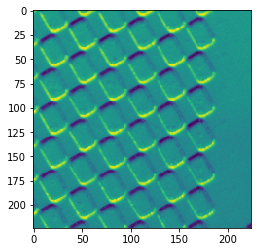

In [10]:
img = images[0,:].reshape(6,224,224)
plt.imshow(img[0,:,:])

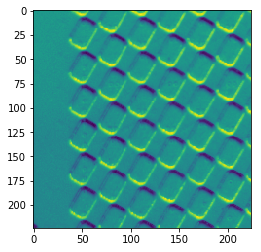

In [14]:
img1 = images[0,:]
img_re = []
for i in range(6*224):
    start = i*224
    end = (i+1)*224
    img_re.append(img1[start:end][::-1])

img = np.array(img_re).reshape(6,224,224)
plt.imshow(img[0,:,:])

In [15]:
img.shape

(6, 224, 224)

In [54]:
def reverse(images,channel):
    images_re = []
    for i in range(len(images)):
        img = images[i,:]
        img_re = []
        for j  in range(channel*224):
            start = j*224
            end = (j+1)*224
            img_re.append(img[start:end][::-1])
        img_re = np.array(img_re).ravel()
        images_re.append(img_re)
    return np.array(images_re)

In [53]:
4*224*224

200704

In [47]:
images_re = reverse(images)

In [51]:
images_re.shape

(6596, 301056)

In [55]:
masks_re = reverse(mask,4)

In [56]:
masks_re.shape

(6596, 200704)

In [59]:
reversed_null = h5py.File('reversed_null.h5','w')
reversed_null['input']=images_re
reversed_null['output']=masks_re